# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

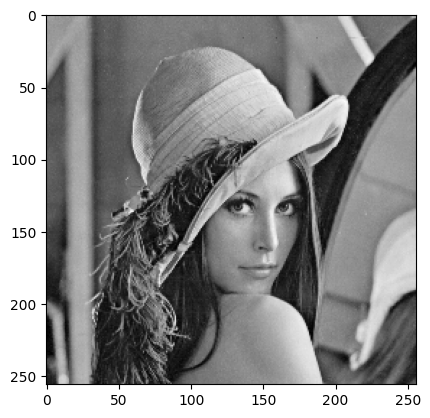

In [2]:
lena = plt.imread('data/lena.png')
plt.imshow(lena, 'gray')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [11]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0] >= n and p[1] < img.shape[1]-n and p[0] < img.shape[0]-n and p[1] >= n:
            for q in numpy.ndindex(3,3):
                if q[1] == 0:
                    neighborhood_sum -= img[p[0] + q[0] - n, p[1] + q[1] -n]
                elif q[1] == 2:
                    neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] -n]
            mean = neighborhood_sum/ 6
            result[p] = mean   
    return result
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0] >= n and p[1] < img.shape[1]-n and p[0] < img.shape[0]-n and p[1] >= n:
            for q in numpy.ndindex(3,3):
                if q[0] == 0:
                    neighborhood_sum -= img[p[0] + q[0] - n, p[1] + q[1] -n]
                elif q[0] == 2:
                    neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] -n]
            mean = neighborhood_sum/ 6
            result[p] = mean
    return result

In [4]:
for q in numpy.ndindex(3,3):
    print(q)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

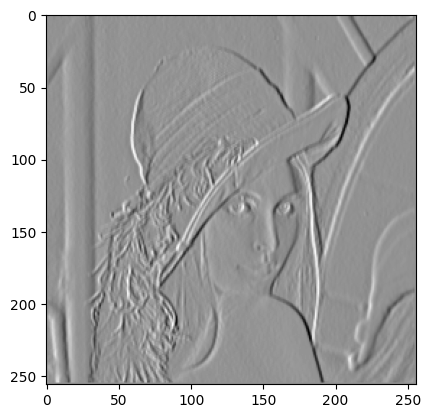

In [15]:
img1 = lena.copy()
prewitth = prewitt_h(img1)
plt.imshow(prewitth, 'gray')

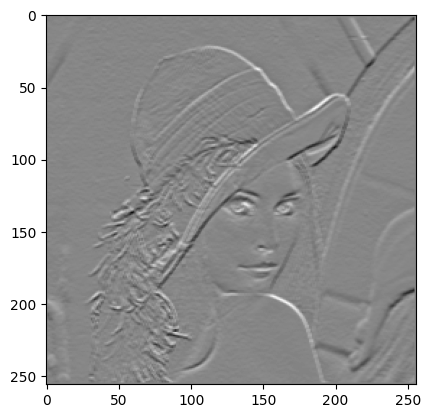

In [16]:
img2 = lena.copy()
prewittv = prewitt_v(img2)
plt.imshow(prewittv, 'gray')

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: